# Simple RNN

## Create Training Data

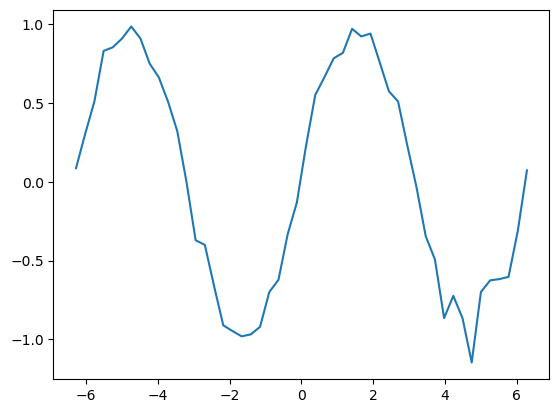

(40, 10, 1)
(40, 10, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) # x_data = [-2π, 2π]
sin_data = np.sin(x_data) + 0.1 * np.random.randn(len(x_data)) # sin_data = sin(x_data) + 0.1 * noise

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 # number of RNN units
n_sample = len(x_data) - n_rnn # number of samples
x= np.zeros((n_sample, n_rnn)) # input data
t = np.zeros((n_sample, n_rnn)) # output data
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1] # t is shifted by 1 from x

x = x.reshape(n_sample, n_rnn, 1) # reshape to 3D array
t = t.reshape(n_sample, n_rnn, 1)
print(x.shape)
print(t.shape)

## Create Model

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

batch_size = 8
n_in = 1
n_hidden = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_hidden, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

2023-03-02 17:14:29.665437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 17:14:56.956020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [3]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 6s 315ms/step - loss: 0.5917 - accuracy: 0.0000e+00 - val_loss: 0.5044 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 35ms/step - loss: 0.3808 - accuracy: 0.0000e+00 - val_loss: 0.3316 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 47ms/step - loss: 0.2587 - accuracy: 0.0000e+00 - val_loss: 0.2412 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.1923 - accuracy: 0.0000e+00 - val_loss: 0.1769 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 37ms/step - loss: 0.1539 - accuracy: 0.0000e+00 - val_loss: 0.1452 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 0.1321 - accuracy: 0.0000e+00 - val_loss: 0.1268 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 113ms/step - loss: 0.1177 - accuracy: 0.0000e+00 - val_loss: 0.1

## History

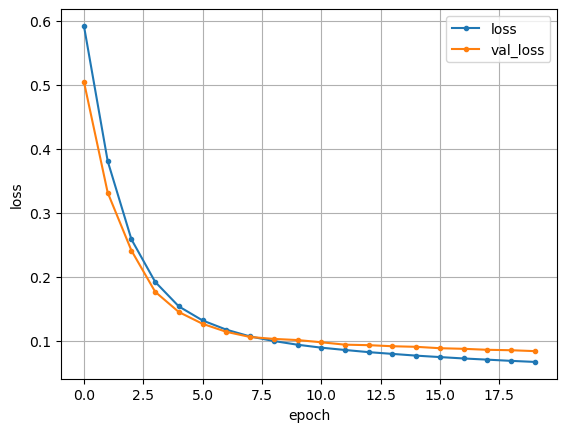

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(loss)), loss, marker='.', label='loss')
plt.plot(range(len(val_loss)), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Predict

1/1 [==============================] - 0s 47ms/step


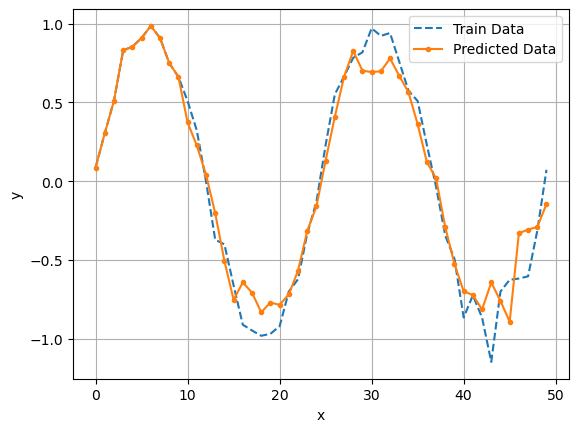

In [8]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    xhat = x[i].reshape(1, n_rnn, 1)
    yhat = model.predict(xhat)
    predicted = np.append(predicted, yhat[0][-1])

plt.plot(range(len(sin_data)), sin_data, linestyle='dashed', label='Train Data')
plt.plot(range(len(predicted)), predicted, marker='.', label='Predicted Data')
plt.legend(loc='best')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()